# DataSpark: Illuminating Insights for Global Electronics

In [1]:
import chardet
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
files = [r'D:\Courses\Guvi AI_ML_DS\GE_Datasets\Customers.csv', r'D:\Courses\Guvi AI_ML_DS\GE_Datasets\Sales.csv', r'D:\Courses\Guvi AI_ML_DS\GE_Datasets\Products.csv', r'D:\Courses\Guvi AI_ML_DS\GE_Datasets\Stores.csv', r'D:\Courses\Guvi AI_ML_DS\GE_Datasets\Exchange_Rates.csv' ]

for f in files:
    with open(f, 'rb') as file:
        res = chardet.detect(file.read())
        print(f"Detected encoding for {file} : {res['encoding']}")

Detected encoding for <_io.BufferedReader name='D:\\Courses\\Guvi AI_ML_DS\\GE_Datasets\\Customers.csv'> : Windows-1252
Detected encoding for <_io.BufferedReader name='D:\\Courses\\Guvi AI_ML_DS\\GE_Datasets\\Sales.csv'> : ascii
Detected encoding for <_io.BufferedReader name='D:\\Courses\\Guvi AI_ML_DS\\GE_Datasets\\Products.csv'> : ascii
Detected encoding for <_io.BufferedReader name='D:\\Courses\\Guvi AI_ML_DS\\GE_Datasets\\Stores.csv'> : utf-8
Detected encoding for <_io.BufferedReader name='D:\\Courses\\Guvi AI_ML_DS\\GE_Datasets\\Exchange_Rates.csv'> : ascii


In [3]:
# Function to calculate age and age_range
def get_age(date):
    today = datetime.now()
    return(today.year - date.year - ((today.month, today.day) < (date.month, date.day)))

def get_agerange(age):
    if age < 10:
        return 'Under 10'
    elif age < 20:
        return '10-19'
    elif age < 30:
        return '20-29'
    elif age < 40:
        return '30-39'
    elif age < 50:
        return '40-49'
    elif age < 60:
        return '50-59'
    else:
        return '60 and above'   

# Data Preprocessing

In [4]:
# Load Customer data onto Pandas dataframe
customers = pd.read_csv(r'D:\Courses\Guvi AI_ML_DS\GE_Datasets\Customers.csv', encoding='windows-1252')

print(customers.info(),"\n")
print(customers.head(),"\n")
print(customers.describe(include='all'),"\n")

# Checking for missing values
customers[customers.isna().any(axis=1)]
# Replacing null values in State Code for Naploli with its state code NA
customers.fillna('NA',inplace=True)

# Converting Birthday to Date format
customers['Birthday'] = pd.to_datetime(customers['Birthday'], format='%m/%d/%Y', errors='coerce')

# Removing spaces in column names for MySQL
customers.columns = customers.columns.str.replace(' ', '')

# Checking for Duplicates - No Duplicates found
customers.duplicated().sum()

# Calculating age and age_range for analysis/reporting purposes
customers['Age'] = customers['Birthday'].apply(get_age)
customers['AgeRange'] = customers['Age'].apply(get_agerange).astype('category')

# Renaming columns to have unique names
customers.rename(columns={
    'City'      : 'Cust_City',
    'StateCode' : 'Cust_StateCode',
    'State'     : 'Cust_State',
    'ZipCode'   : 'Cust_ZipCode',
    'Country'   : 'Cust_Country',
    'Continent' : 'Cust_Continent'
}, inplace=True)

customers.to_csv(r'D:\Courses\Guvi AI_ML_DS\GE_Datasets\Cleaned_Customers.csv', index=False)
print("Customers data cleaning completed ....")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB
None 

   CustomerKey  Gender               Name            City State Code  \
0          301  Female      Lilly Harding  WANDEARAH EAST         SA   
1          325  Female       Madison Hull      MOUNT BUDD         WA   
2          554  Female      Claire Ferres       WINJALLOK        VIC   
3          786    Male  Jai Poltpalingada    MIDDLE RI

EDA on Cleaned Customer Data ..... 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CustomerKey     15266 non-null  int64         
 1   Gender          15266 non-null  object        
 2   Name            15266 non-null  object        
 3   Cust_City       15266 non-null  object        
 4   Cust_StateCode  15266 non-null  object        
 5   Cust_State      15266 non-null  object        
 6   Cust_ZipCode    15266 non-null  object        
 7   Cust_Country    15266 non-null  object        
 8   Cust_Continent  15266 non-null  object        
 9   Birthday        15266 non-null  datetime64[ns]
 10  Age             15266 non-null  int64         
 11  AgeRange        15266 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 1.4+ MB
None 

   CustomerKey  Gender               Name       Cu

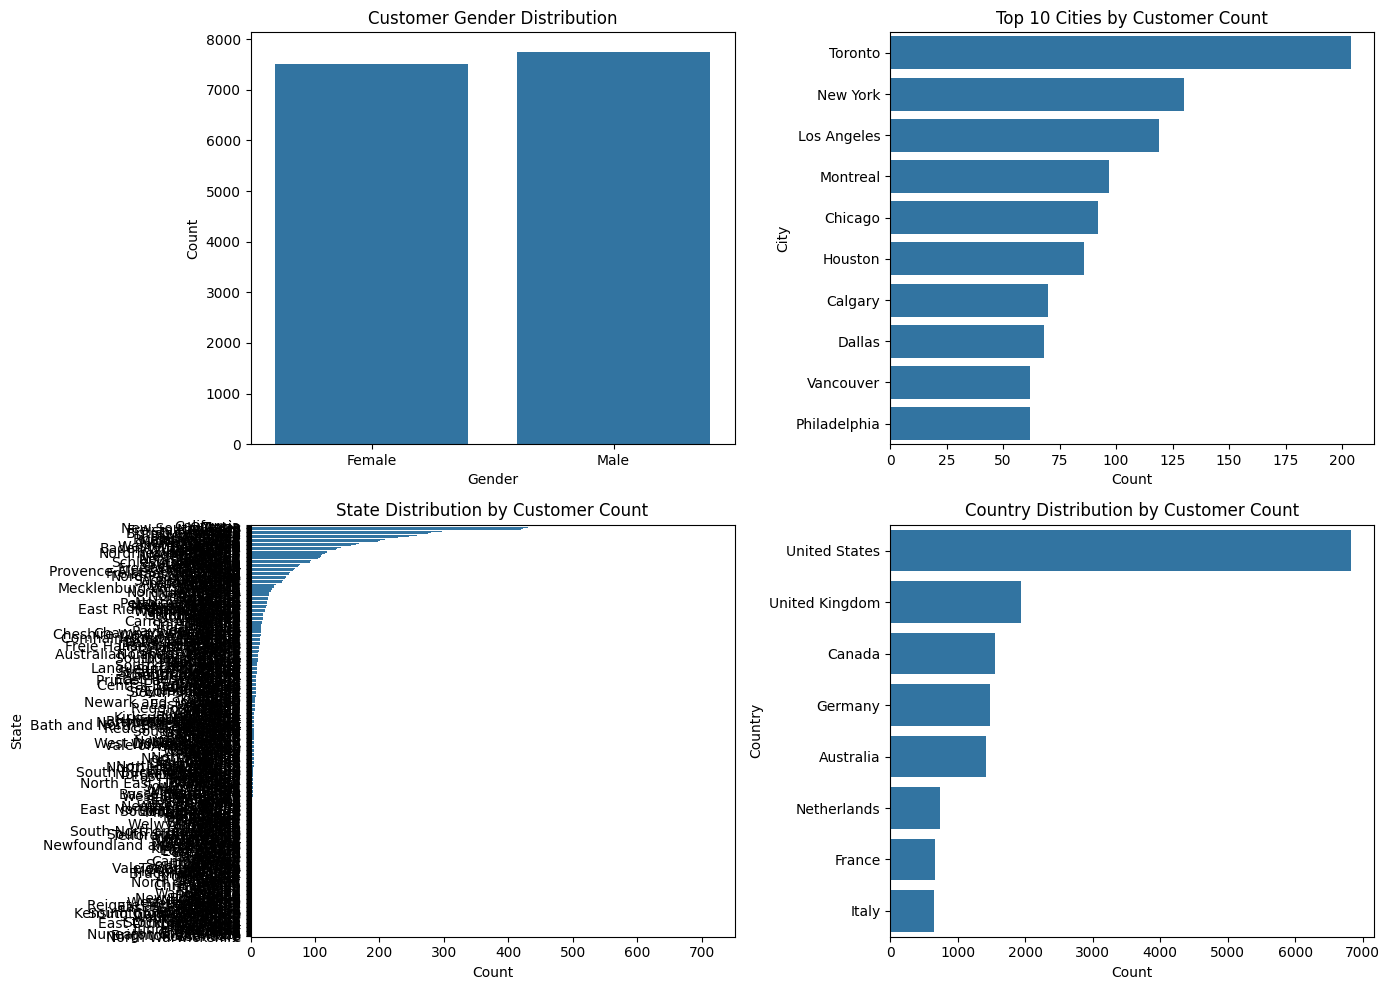

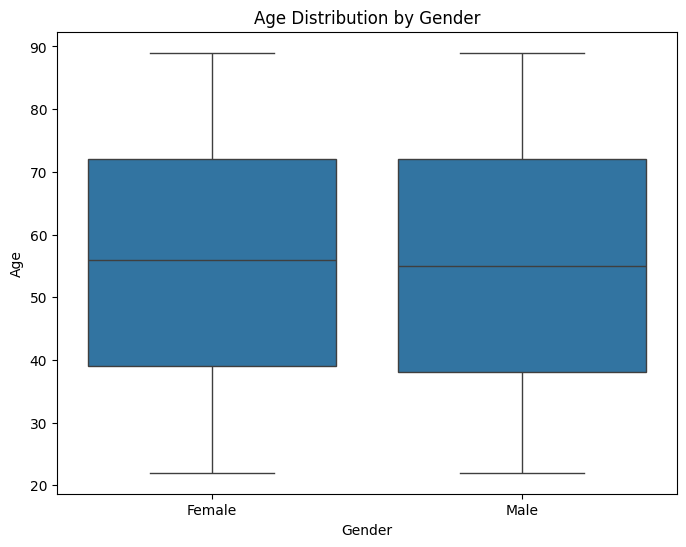

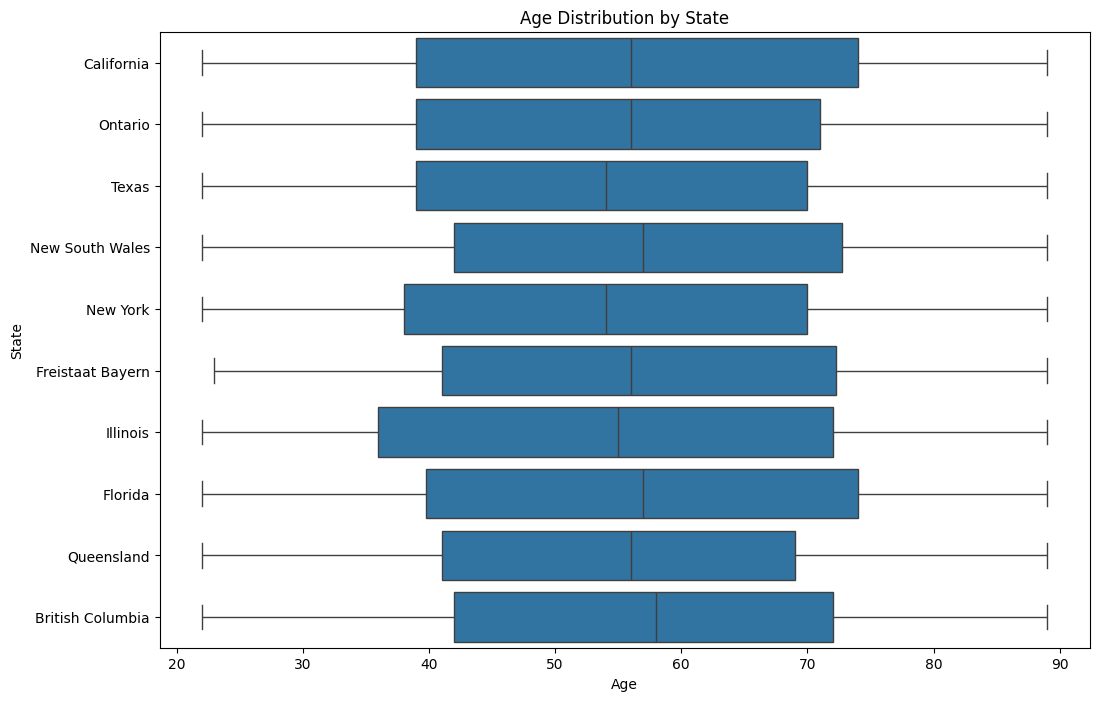

In [5]:
# EDA on Cleaned Customer Data

customers = pd.read_csv(r'D:\Courses\Guvi AI_ML_DS\GE_Datasets\Cleaned_Customers.csv')
customers.fillna('NA',inplace=True)
customers['Birthday'] = pd.to_datetime(customers['Birthday'], errors='coerce')

print("EDA on Cleaned Customer Data ..... \n")
print(customers.info(),"\n")
print(customers.head(),"\n")
print(customers.describe(include='all'),"\n")
print(customers.isnull().sum(),"\n")

plt.figure(figsize=(14, 10))

# 1. Gender Distribution
plt.subplot(2, 2, 1)
sns.countplot(x='Gender', data=customers)
plt.title('Customer Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# 2. Top 10 Cities (City Distribution)
plt.subplot(2, 2, 2)
sns.countplot(y='Cust_City', data=customers, order=customers['Cust_City'].value_counts().index[:10])
plt.title('Top 10 Cities by Customer Count')
plt.xlabel('Count')
plt.ylabel('City')

# 3. State Distribution
plt.subplot(2, 2, 3)
sns.countplot(y='Cust_State', data=customers, order=customers['Cust_State'].value_counts().index)
plt.title('State Distribution by Customer Count')
plt.xlabel('Count')
plt.ylabel('State')

# 4. Country Distribution
plt.subplot(2, 2, 4)
sns.countplot(y='Cust_Country', data=customers, order=customers['Cust_Country'].value_counts().index)
plt.title('Country Distribution by Customer Count')
plt.xlabel('Count')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

# 5. Age by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Age', data=customers)
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

# 6. Age by State (Top 10 States by Customer Count)
plt.figure(figsize=(12, 8))
sns.boxplot(y='Cust_State', x='Age', data=customers, order=customers['Cust_State'].value_counts().index[:10])
plt.title('Age Distribution by State')
plt.xlabel('Age')
plt.ylabel('State')
plt.show()


In [6]:
# Exchange Rates data
exchange = pd.read_csv(r'D:\Courses\Guvi AI_ML_DS\GE_Datasets\Exchange_Rates.csv')

print(exchange.info(),"\n")
print(exchange.head(),"\n")
print(exchange.describe(include='all'),"\n")

# Checking for missing/null values: No null values found
exchange.isna().sum()

# Converting 'Date' to Date format
exchange['Date'] = pd.to_datetime(exchange['Date'], format='%m/%d/%Y', errors='coerce')

# Checking for Duplicates: No duplicates found
exchange.duplicated().sum()

# Save cleaned dataset
exchange.to_csv(r'D:\Courses\Guvi AI_ML_DS\GE_Datasets\Cleaned_ExchangeRates.csv', index=False)
print("\nExchange Rates data cleaning completed ....")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      11215 non-null  object 
 1   Currency  11215 non-null  object 
 2   Exchange  11215 non-null  float64
dtypes: float64(1), object(2)
memory usage: 263.0+ KB
None 

       Date Currency  Exchange
0  1/1/2015      USD    1.0000
1  1/1/2015      CAD    1.1583
2  1/1/2015      AUD    1.2214
3  1/1/2015      EUR    0.8237
4  1/1/2015      GBP    0.6415 

            Date Currency      Exchange
count      11215    11215  11215.000000
unique      2243        5           NaN
top     1/1/2015      USD           NaN
freq           5     2243           NaN
mean         NaN      NaN      1.061682
std          NaN      NaN      0.245519
min          NaN      NaN      0.628500
25%          NaN      NaN      0.857800
50%          NaN      NaN      1.000000
75%          NaN      NaN      1.311900
max     

In [7]:
# EDA on Exchange Rates

exchange = pd.read_csv(r'D:\Courses\Guvi AI_ML_DS\GE_Datasets\Cleaned_ExchangeRates.csv')
exchange['Date'] = pd.to_datetime(exchange['Date'], errors='coerce')

print("EDA on cleaned Exchange Rates data\n")
print(exchange.info(),"\n")
print(exchange.head(),"\n")
print(exchange.describe(include='all'),"\n")

EDA on cleaned Exchange Rates data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      11215 non-null  datetime64[ns]
 1   Currency  11215 non-null  object        
 2   Exchange  11215 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 263.0+ KB
None 

        Date Currency  Exchange
0 2015-01-01      USD    1.0000
1 2015-01-01      CAD    1.1583
2 2015-01-01      AUD    1.2214
3 2015-01-01      EUR    0.8237
4 2015-01-01      GBP    0.6415 

                       Date Currency      Exchange
count                 11215    11215  11215.000000
unique                  NaN        5           NaN
top                     NaN      USD           NaN
freq                    NaN     2243           NaN
mean    2018-01-26 00:00:00      NaN      1.061682
min     2015-01-01 00:00:00      NaN      0.62

In [8]:
# Products data
products = pd.read_csv(r'D:\Courses\Guvi AI_ML_DS\GE_Datasets\Products.csv')

print(products.info(),"\n")
print(products.head(),"\n")
print(products.describe(include='all'),"\n")

# Checking for missing/null values: No null values found
products.isna().sum()

# Checking for Duplicates: No duplicates found
products.duplicated().sum()

# Converting Unit Cost/Price USD to float & removing $ and ,
products['Unit Cost USD'] = products['Unit Cost USD'].str.replace(r'[\$,]', '', regex=True).astype(float)
products['Unit Price USD'] = products['Unit Price USD'].str.replace(r'[\$,]', '', regex=True).astype(float)

# Removing spaces in column names for MySQL
products.columns = products.columns.str.replace(' ', '')

# Save cleaned dataset
products.to_csv(r'D:\Courses\Guvi AI_ML_DS\GE_Datasets\Cleaned_Products.csv', index=False)

print("\nProducts data cleaning completed ....")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB
None 

   ProductKey                         Product Name    Brand   Color  \
0           1  Contoso 512MB MP3 Player E51 Silver  Contoso  Silver   
1           2    Contoso 512MB MP3 Player E51 Blue  Contoso    Blue   
2           3     Contoso 1G MP3 Player E100 White  Contoso   White   
3           4    Conto

EDA on cleaned Products Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ProductKey      2517 non-null   int64  
 1   ProductName     2517 non-null   object 
 2   Brand           2517 non-null   object 
 3   Color           2517 non-null   object 
 4   UnitCostUSD     2517 non-null   float64
 5   UnitPriceUSD    2517 non-null   float64
 6   SubcategoryKey  2517 non-null   int64  
 7   Subcategory     2517 non-null   object 
 8   CategoryKey     2517 non-null   int64  
 9   Category        2517 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 196.8+ KB
None 

   ProductKey                          ProductName    Brand   Color  \
0           1  Contoso 512MB MP3 Player E51 Silver  Contoso  Silver   
1           2    Contoso 512MB MP3 Player E51 Blue  Contoso    Blue   
2           3     Contoso 1G MP3 Player 

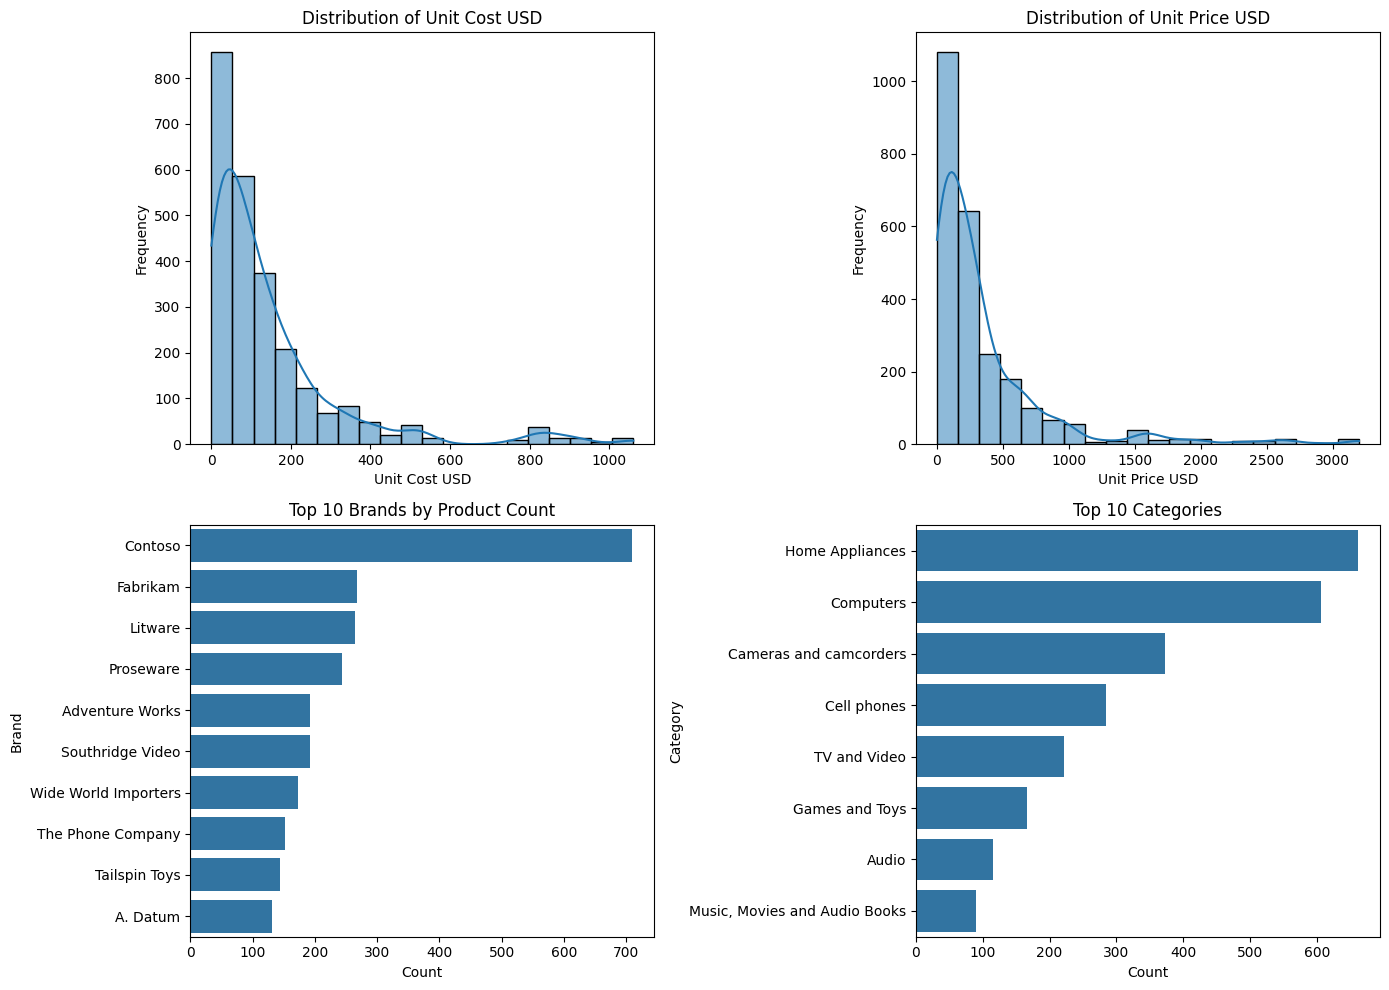

In [9]:
# EDA on Products data
products = pd.read_csv(r'D:\Courses\Guvi AI_ML_DS\GE_Datasets\Cleaned_Products.csv')

print("EDA on cleaned Products Data")
print(products.info(),"\n")
print(products.head(),"\n")
print(products.describe(include='all'),"\n")

plt.figure(figsize=(14, 10))

# 1. Distribution of Unit Cost USD
plt.subplot(2, 2, 1)
sns.histplot(products['UnitCostUSD'].dropna(), bins=20, kde=True)
plt.title('Distribution of Unit Cost USD')
plt.xlabel('Unit Cost USD')
plt.ylabel('Frequency')

# 2. Distribution of Unit Price USD
plt.subplot(2, 2, 2)
sns.histplot(products['UnitPriceUSD'].dropna(), bins=20, kde=True)
plt.title('Distribution of Unit Price USD')
plt.xlabel('Unit Price USD')
plt.ylabel('Frequency')

# 3. Top 10 Brands
plt.subplot(2, 2, 3)
sns.countplot(y='Brand', data=products, order=products['Brand'].value_counts().index[:10])
plt.title('Top 10 Brands by Product Count')
plt.xlabel('Count')
plt.ylabel('Brand')

# 4. Top 10 Categories  
plt.subplot(2, 2, 4)
sns.countplot(y='Category', data=products, order=products['Category'].value_counts().index[:10])
plt.title('Top 10 Categories')
plt.xlabel('Count')
plt.ylabel('Category')

plt.tight_layout()
plt.show()

In [10]:
# Sales data
sales = pd.read_csv(r'D:\Courses\Guvi AI_ML_DS\GE_Datasets\Sales.csv')

print(sales.info(),"\n")
print(sales.head(),"\n")
print(sales.describe(),"\n")
print(sales.isna().sum(),"\n")

# Removing spaces in column names to handle better in SQL
sales.columns = sales.columns.str.replace(' ', '')

# Converting Order Date, Delivery Date to Datetime format
sales['OrderDate'] = pd.to_datetime(sales['OrderDate'], errors='coerce')
sales['DeliveryDate'] = pd.to_datetime(sales['DeliveryDate'])

# Checking for and Displaying Missing Values
sales[sales.isnull().any(axis=1)]
# Setting order date as delivery date = NULL assuming it as in-store order
sales.loc[
    sales['DeliveryDate'].isna() & (sales['StoreKey'] != 0), 'DeliveryDate'
    ] = sales['OrderDate']

# Handling Duplicates: No Duplicates found
sales.duplicated().sum()

sales.to_csv(r'D:\Courses\Guvi AI_ML_DS\GE_Datasets\Cleaned_Sales.csv', index=False)
print("\nSales data cleaning completed ....")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB
None 

   Order Number  Line Item Order Date Delivery Date  CustomerKey  StoreKey  \
0        366000          1   1/1/2016           NaN       265598        10   
1        366001          1   1/1/2016     1/13/2016      1269051         0   
2        366001          2   1/1/2016     1/13/2016      1269051         0   
3        366002          1   1/1/2016     1/12/201

EDA on cleaned Sales data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   OrderNumber   62884 non-null  int64         
 1   LineItem      62884 non-null  int64         
 2   OrderDate     62884 non-null  datetime64[ns]
 3   DeliveryDate  62884 non-null  datetime64[ns]
 4   CustomerKey   62884 non-null  int64         
 5   StoreKey      62884 non-null  int64         
 6   ProductKey    62884 non-null  int64         
 7   Quantity      62884 non-null  int64         
 8   CurrencyCode  62884 non-null  object        
dtypes: datetime64[ns](2), int64(6), object(1)
memory usage: 4.3+ MB
None 

   OrderNumber  LineItem  OrderDate DeliveryDate  CustomerKey  StoreKey  \
0       366000         1 2016-01-01   2016-01-01       265598        10   
1       366001         1 2016-01-01   2016-01-13      1269051         0   
2       366001 

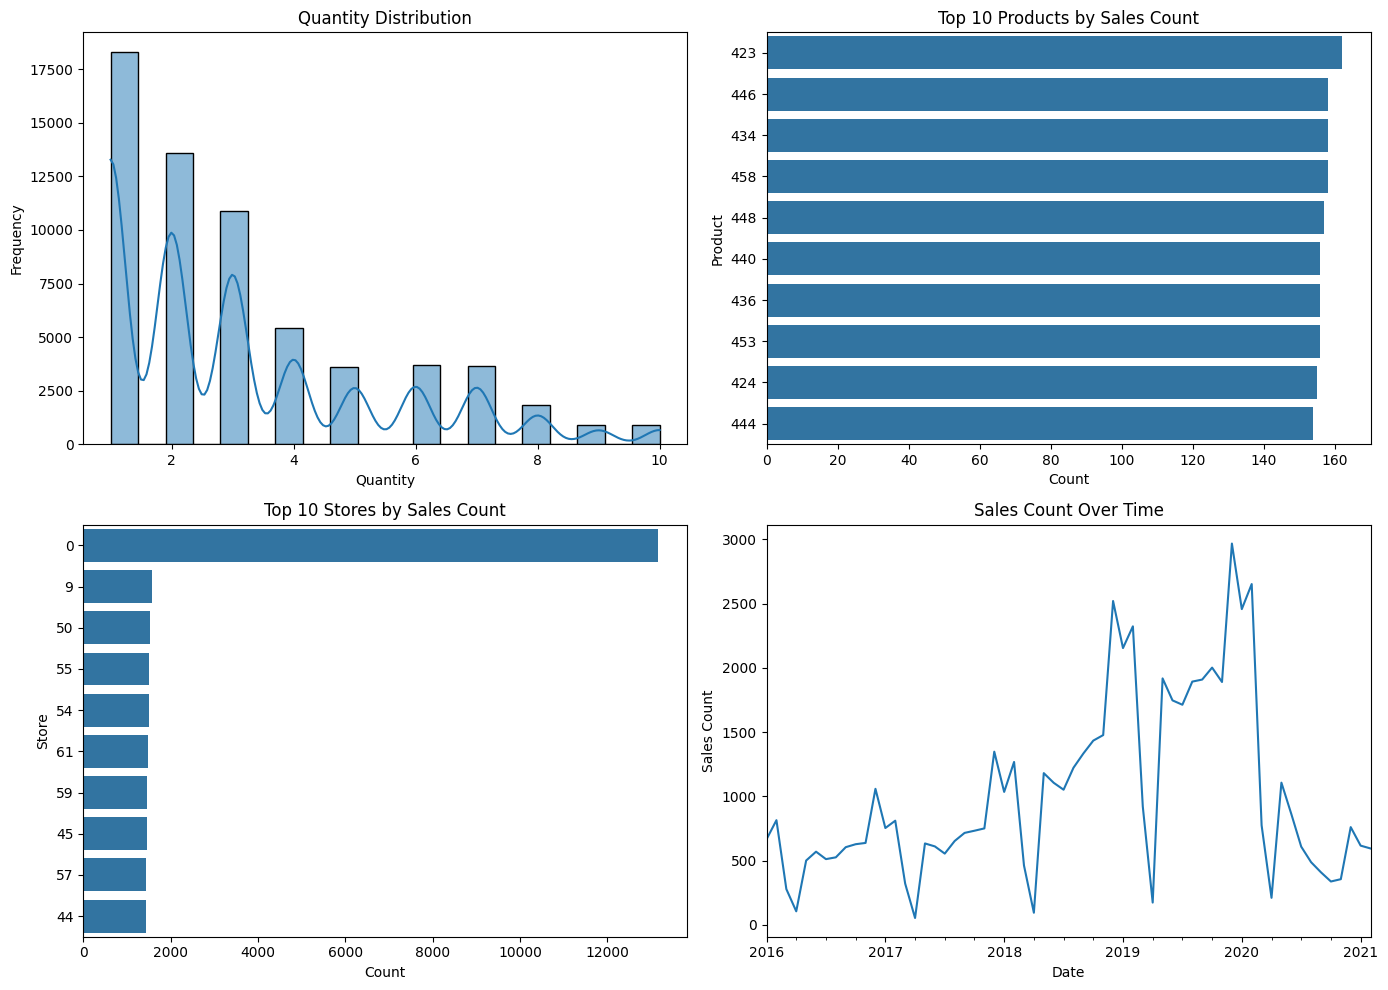

In [11]:
# EDA on Sales Data
sales = pd.read_csv(r'D:\Courses\Guvi AI_ML_DS\GE_Datasets\Cleaned_Sales.csv')

# Converting Order Date, Delivery Date to Datetime format
sales['OrderDate'] = pd.to_datetime(sales['OrderDate'], errors='coerce')
sales['DeliveryDate'] = pd.to_datetime(sales['DeliveryDate'])

print("EDA on cleaned Sales data")
print(sales.info(),"\n")
print(sales.head(),"\n")
print(sales.describe(),"\n")
print(sales.isna().sum(),"\n")

plt.figure(figsize=(14, 10))  # Adjusted figure size to fit fewer plots

# 1. Quantity Distribution
plt.subplot(2, 2, 1)
sns.histplot(sales['Quantity'].dropna(), bins=20, kde=True)
plt.title('Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

# 2. Sales by Product (Top 10 Products)
plt.subplot(2, 2, 2)
if 'ProductKey' in sales.columns:
    sns.countplot(y='ProductKey', data=sales, order=sales['ProductKey'].value_counts().index[:10])
    plt.title('Top 10 Products by Sales Count')
    plt.xlabel('Count')
    plt.ylabel('Product')

# 3. Sales by Store (Top 10 Stores)
plt.subplot(2, 2, 3)
if 'StoreKey' in sales.columns:
    sns.countplot(y='StoreKey', data=sales, order=sales['StoreKey'].value_counts().index[:10])
    plt.title('Top 10 Stores by Sales Count')
    plt.xlabel('Count')
    plt.ylabel('Store')

# 4. Sales Over Time
plt.subplot(2, 2, 4)
if 'OrderDate' in sales.columns:
    sales['OrderDate'].groupby(sales['OrderDate'].dt.to_period('M')).count().plot()
    plt.title('Sales Count Over Time')
    plt.xlabel('Date')
    plt.ylabel('Sales Count')
    
plt.tight_layout()
plt.show()

In [12]:
# Stores data
stores = pd.read_csv(r'D:\Courses\Guvi AI_ML_DS\GE_Datasets\Stores.csv')

print(stores.info(),"\n")
print(stores.head(),"\n")
print(stores.describe(),"\n")

#  Checking for and Displaying Missing Values: 1 missing in Square Meters 
stores[stores.isna().any(axis=1)]
# Replacing null values in 'Square Meters' with 0 as it is for online
stores.fillna(0, inplace=True)

# Removing spaces in column names to handle better in SQL
stores.columns = stores.columns.str.replace(' ', '')

# Converting OpenDate to Datetime format
stores['OpenDate'] = pd.to_datetime(stores['OpenDate'], format='%m/%d/%Y', errors='coerce')

# Handling Duplicates: No Duplicates found
stores.duplicated().sum()

# Adding StoreAge for further analysis/reporting purposes
stores['StoreAge'] = stores['OpenDate'].apply(get_age)

# Renaming columns to have unique names
stores.rename(columns={
    'State'     : 'Store_State',
    'Country'   : 'Store_Country',
    }, inplace=True)

stores.to_csv(r'D:\Courses\Guvi AI_ML_DS\GE_Datasets\Cleaned_Stores.csv', index=False)
print("\nStores data cleaning completed ....")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  66 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB
None 

   StoreKey    Country                         State  Square Meters  Open Date
0         1  Australia  Australian Capital Territory          595.0   1/1/2008
1         2  Australia            Northern Territory          665.0  1/12/2008
2         3  Australia               South Australia         2000.0   1/7/2012
3         4  Australia                      Tasmania         2000.0   1/1/2010
4         5  Australia                      Victoria         2000.0  12/9/2015 

        StoreKey  Square Meters
count  67.000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   StoreKey       67 non-null     int64         
 1   Store_Country  67 non-null     object        
 2   Store_State    67 non-null     object        
 3   SquareMeters   67 non-null     float64       
 4   OpenDate       0 non-null      datetime64[ns]
 5   StoreAge       67 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 3.3+ KB
None 

   StoreKey Store_Country                   Store_State  SquareMeters  \
0         1     Australia  Australian Capital Territory         595.0   
1         2     Australia            Northern Territory         665.0   
2         3     Australia               South Australia        2000.0   
3         4     Australia                      Tasmania        2000.0   
4         5     Australia            

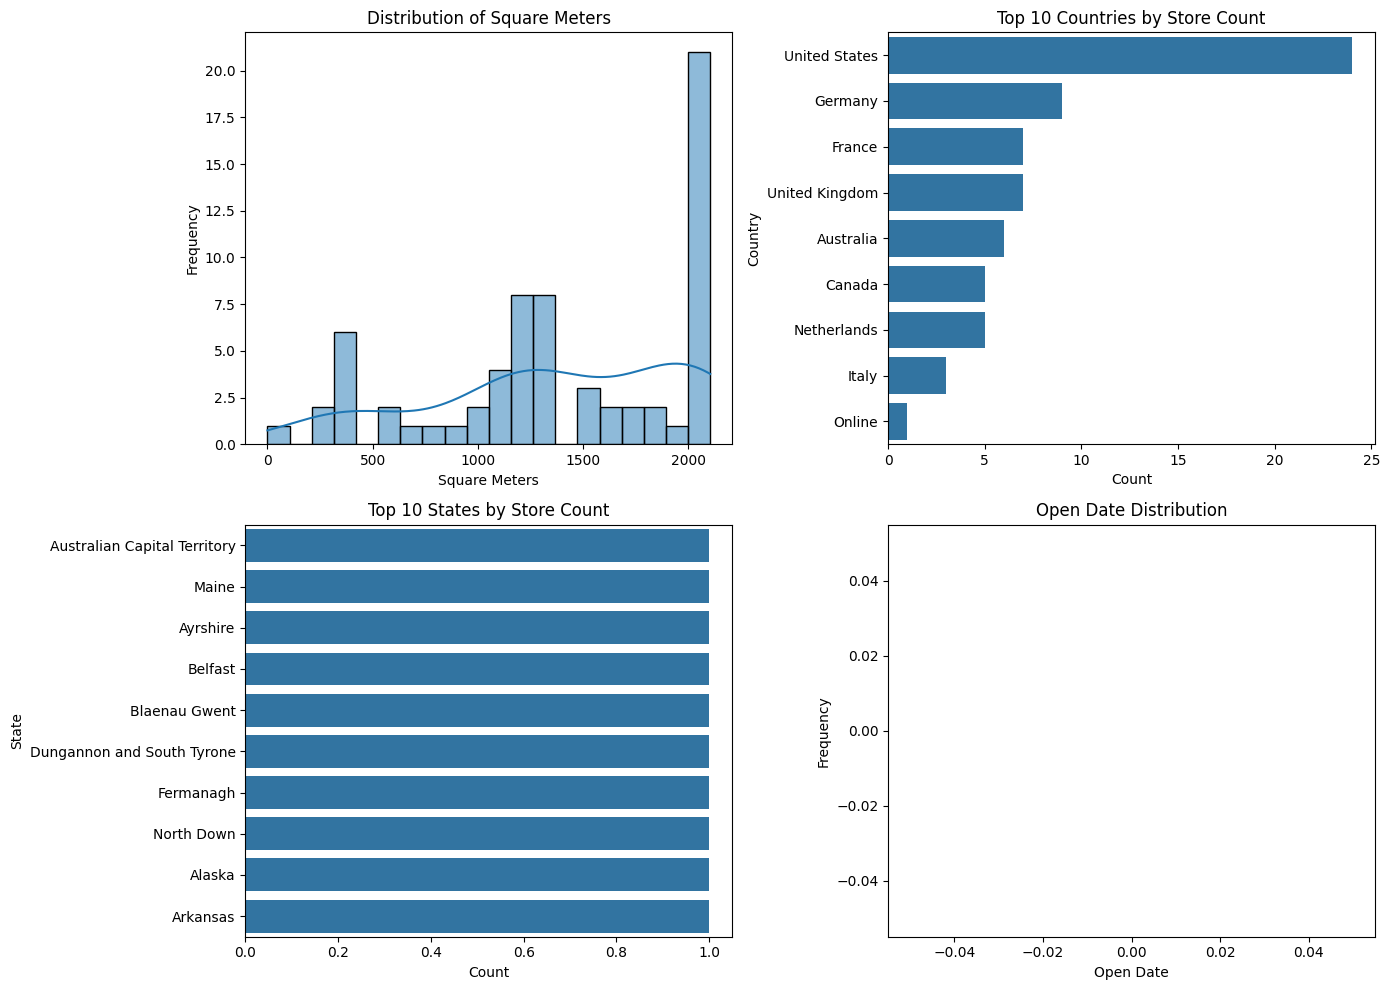

In [13]:
# EDA on Stores Cleaned Data
stores = pd.read_csv(r'D:\Courses\Guvi AI_ML_DS\GE_Datasets\Cleaned_Stores.csv')
stores['OpenDate'] = pd.to_datetime(stores['OpenDate'], format='%m/%d/%Y', errors='coerce')

print(stores.info(),"\n")
print(stores.head(),"\n")
print(stores.describe(),"\n")

plt.figure(figsize=(14, 10))

# 1. Distribution of Square Meters
plt.subplot(2, 2, 1)
sns.histplot(stores['SquareMeters'].dropna(), bins=20, kde=True)
plt.title('Distribution of Square Meters')
plt.xlabel('Square Meters')
plt.ylabel('Frequency')

# 2. Stores by Country (Top 10 Countries) 
plt.subplot(2, 2, 2)
if 'Store_Country' in stores.columns:
    sns.countplot(y='Store_Country', data=stores, order=stores['Store_Country'].value_counts().index[:10])
    plt.title('Top 10 Countries by Store Count')
    plt.xlabel('Count')
    plt.ylabel('Country')

# 3. States by Store Age (Top 10 States)
plt.subplot(2, 2, 3)
if 'Store_State' in stores.columns:
    sns.countplot(y='Store_State', data=stores, order=stores['Store_State'].value_counts().index[:10])
    plt.title('Top 10 States by Store Count')
    plt.xlabel('Count')
    plt.ylabel('State')

# 4. Open Date Distribution
plt.subplot(2, 2, 4)
if 'OpenDate' in stores.columns:
    sns.histplot(stores['OpenDate'].dropna(), bins=20, kde=True)
    plt.title('Open Date Distribution')
    plt.xlabel('Open Date')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [14]:
if (customers['Cust_StateCode'].isna().any()):
    customers['Cust_StateCode'] = 'NA'

# Merging Datesets

In [15]:
# Merging all the datasets: Sales, Stores, Products, Customers and Exchange_Rates  
df1 = pd.merge(customers, sales, on='CustomerKey', how='left')
df2 = pd.merge(df1, products, on='ProductKey', how='left')
df3 = pd.merge(df2, stores, on='StoreKey', how='left')
final_merged = pd.merge(df3, exchange, left_on=['OrderDate', 'CurrencyCode'], right_on=['Date', 'Currency'])

final_merged.drop(columns=['Date', 'Currency'], inplace=True)

final_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CustomerKey     62884 non-null  int64         
 1   Gender          62884 non-null  object        
 2   Name            62884 non-null  object        
 3   Cust_City       62884 non-null  object        
 4   Cust_StateCode  62884 non-null  object        
 5   Cust_State      62884 non-null  object        
 6   Cust_ZipCode    62884 non-null  object        
 7   Cust_Country    62884 non-null  object        
 8   Cust_Continent  62884 non-null  object        
 9   Birthday        62884 non-null  datetime64[ns]
 10  Age             62884 non-null  int64         
 11  AgeRange        62884 non-null  object        
 12  OrderNumber     62884 non-null  float64       
 13  LineItem        62884 non-null  float64       
 14  OrderDate       62884 non-null  datetime64[ns]
 15  De

# Feature Engineering

In [16]:
# Function to Categorize Order Frequency by Customer
def categorize_frequency(count):
    if count >= 1 and count <= 4:
        return 'Occasional'
    elif count >= 5 and count <= 10:
        return 'Moderate'
    elif count > 10:
        return 'Frequent'
    else:
        return 'Unknown'

In [17]:
#Calculating Reveunue Per Customer USD and Profit Per CustomerUSD
final_merged['RevenueUSD'] = final_merged['Quantity'] * final_merged['UnitPriceUSD']
final_merged['ProfitUSD'] = final_merged['RevenueUSD']- ((final_merged['Quantity'] * final_merged['UnitCostUSD']))

# Number of orders per Customer
order_counts = final_merged.groupby('CustomerKey')['OrderNumber'].count()

# Categorize Order Frequency
order_counts_category = order_counts.apply(categorize_frequency)

# Reset index to merge to dataframe
order_counts_category = order_counts_category.reset_index(name='Frequency')

# Merge with the original DataFrame
final_merged = final_merged.merge(order_counts_category, on='CustomerKey', how='left')

#final_merged.info()
final_merged.to_csv(r'D:\Courses\Guvi AI_ML_DS\GE_Datasets\Merged_Data.csv', index=False)
print("\nMerging of datasets completed ....")


Merging of datasets completed ....


In [18]:
final_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CustomerKey     62884 non-null  int64         
 1   Gender          62884 non-null  object        
 2   Name            62884 non-null  object        
 3   Cust_City       62884 non-null  object        
 4   Cust_StateCode  62884 non-null  object        
 5   Cust_State      62884 non-null  object        
 6   Cust_ZipCode    62884 non-null  object        
 7   Cust_Country    62884 non-null  object        
 8   Cust_Continent  62884 non-null  object        
 9   Birthday        62884 non-null  datetime64[ns]
 10  Age             62884 non-null  int64         
 11  AgeRange        62884 non-null  object        
 12  OrderNumber     62884 non-null  float64       
 13  LineItem        62884 non-null  float64       
 14  OrderDate       62884 non-null  datetime64[ns]
 15  De

In [19]:
final_merged.head()

,CustomerKey,Gender,Name,Cust_City,Cust_StateCode,Cust_State,Cust_ZipCode,Cust_Country,Cust_Continent,Birthday,...,Category,Store_Country,Store_State,SquareMeters,OpenDate,StoreAge,Exchange,RevenueUSD,ProfitUSD,Frequency
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03,...,Audio,Online,Online,0.0,NaT,14.0,1.4587,592.00,395.86,Occasional
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27,...,Computers,Australia,Western Australia,2000.0,NaT,14.0,1.2702,1396.00,754.04,Moderate
2,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27,...,Computers,Australia,Western Australia,2000.0,NaT,14.0,1.2702,632.00,341.36,Moderate
3,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27,...,Cameras and camcorders,Australia,Western Australia,2000.0,NaT,14.0,1.2702,1938.00,1295.91,Moderate
4,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27,...,Computers,Australia,Western Australia,2000.0,NaT,14.0,1.4701,809.85,396.96,Moderate


# EDA to Business Questions

Q1. Customer purchasing behavior across age groups and geographical locations

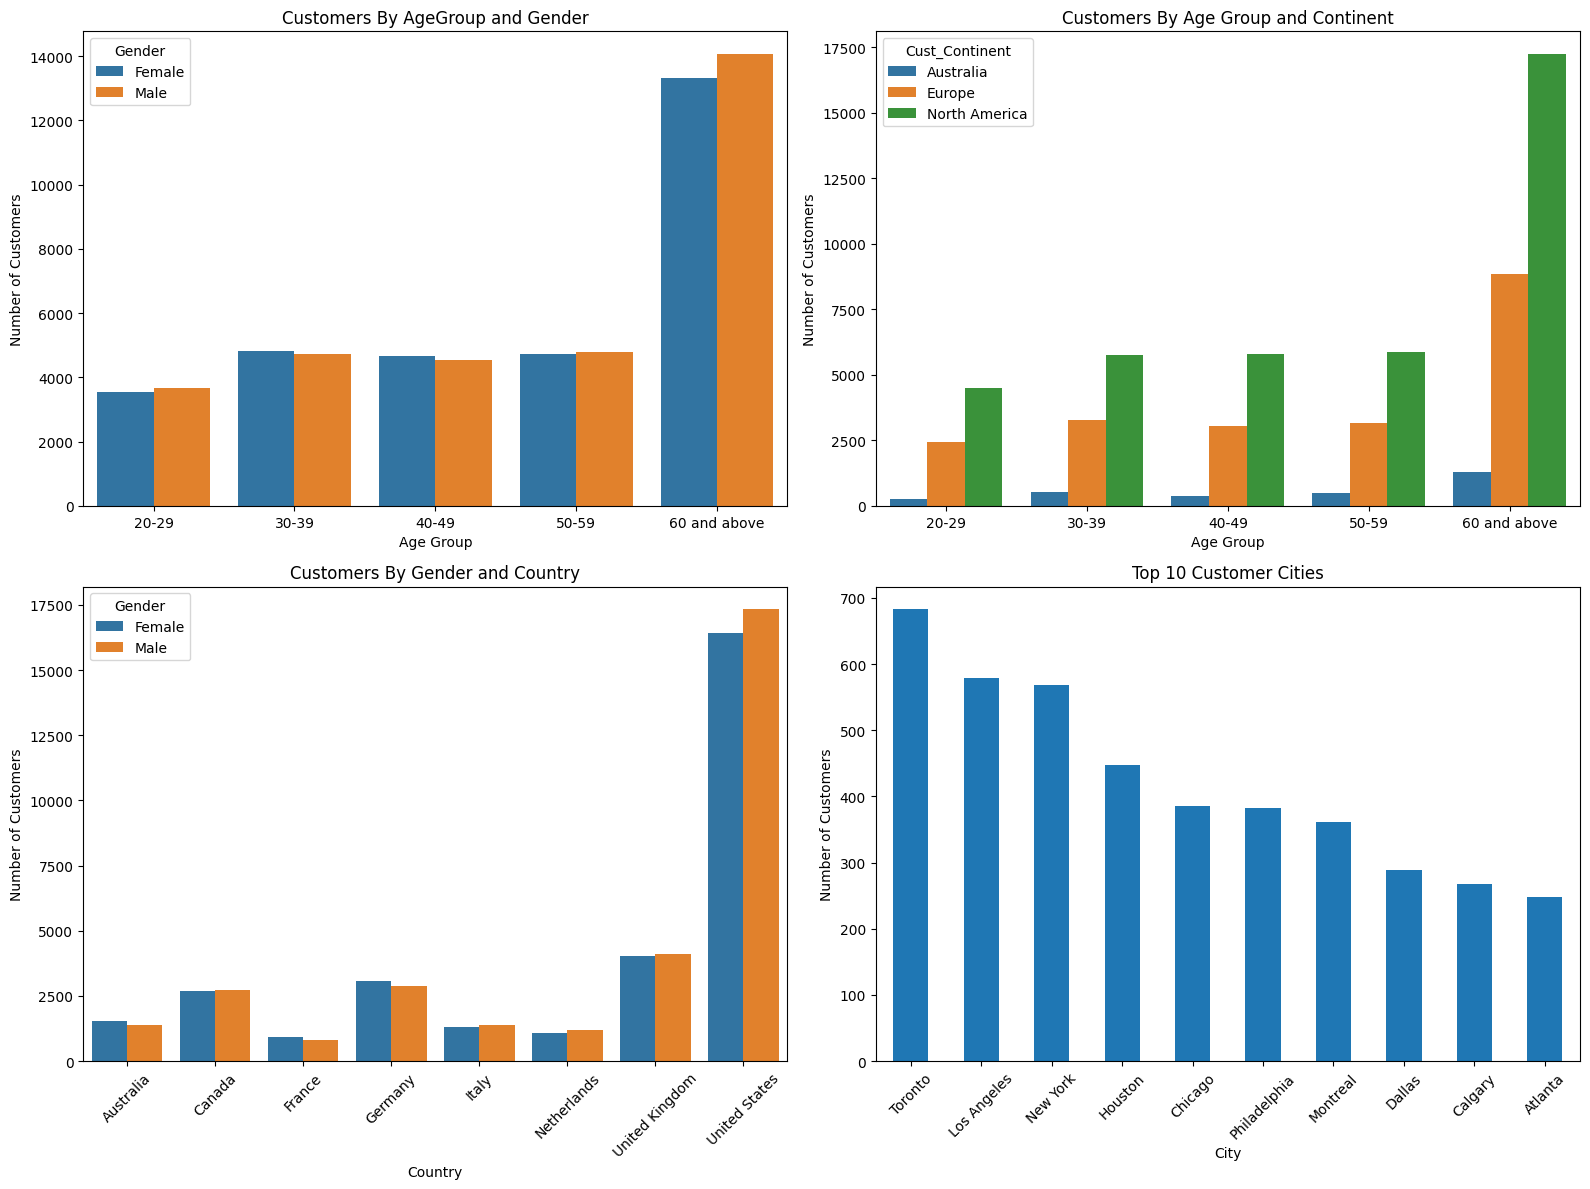

In [20]:
plt.figure(figsize=(16, 12))

# 1. Customers By AgeGroup and Gender
gender_count = final_merged.groupby(['AgeRange', 'Gender']).size().reset_index(name='Count')

plt.subplot(2, 2, 1)
sns.barplot(data=gender_count, x='AgeRange', y='Count', hue='Gender')
plt.title('Customers By AgeGroup and Gender')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')

# 2. Customers By AgeGroup and Continent
cust_count = final_merged.groupby(['AgeRange', 'Cust_Continent']).size().reset_index(name='Count')

plt.subplot(2, 2, 2)
sns.barplot(data=cust_count, x='AgeRange', y='Count', hue='Cust_Continent')
plt.title('Customers By Age Group and Continent')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')

# 3. Customer By Gender and Country
gender_count = final_merged.groupby(['Gender', 'Cust_Country']).size().reset_index(name='Count')
plt.subplot(2, 2, 3)
sns.barplot(data=gender_count, x='Cust_Country', y='Count', hue='Gender')
plt.title('Customers By Gender and Country')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)

# 4. Top 10 Customer Cities
city_count = final_merged['Cust_City'].value_counts()
top_10_cities = city_count.head(10)

plt.subplot(2, 2, 4)
top_10_cities.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.title('Top 10 Customer Cities')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Insights: 

1. The gender distribution appears to be evenly balanced with male and female customers represented more or less equally. This suggests that the retailer's products and marketing strategies may be appealing to both genders.

2. The customer base is predominantly composed of individuals aged 60 and above, and the youngest individuals aged between 20 and 29, represents a significantly smaller portion. The remaining age groups, spanning from 30 to 59 years old, exhibit a relatively uniform distribution. This distribution suggests a diverse customer base with a substantial portion of older individuals, potentially indicating a mature market segment.

3. The majority of customers are from North America followed by Europe and Australia. Toronto is leading amongst other cities along with other cities in the US, followed by the ones in Canada including Montreal, Calgary and Atlanta. All of these cities located in Nourth America, confirms the previous observation.

Q2. correlations between customer demographics (age, gender) and product preferences or purchase frequency

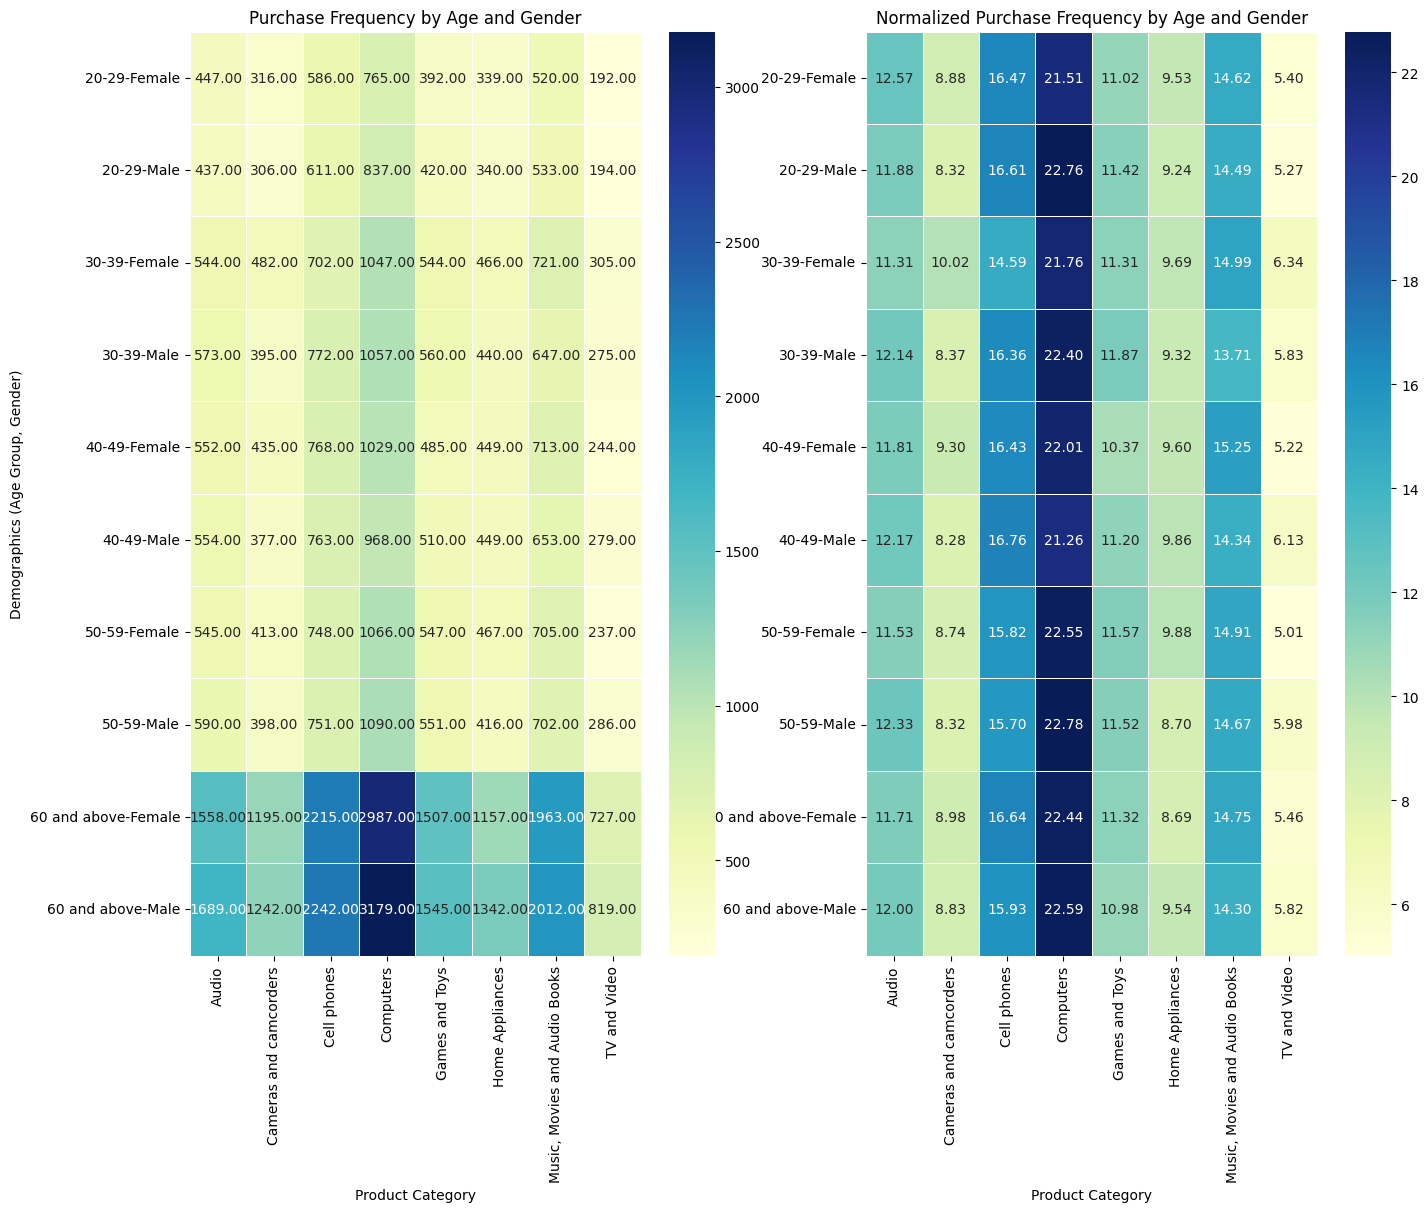

In [21]:
cust_orderfreq = final_merged.groupby(['AgeRange', 'Gender', 'Category']).size().reset_index(name='order_freq')
cust_orderfreq_df = cust_orderfreq.reset_index()

pivot_df = cust_orderfreq_df.pivot(index=['AgeRange', 'Gender'], columns='Category', values='order_freq')
pivot_df_normalized = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 2, figsize=(16, 12))
for i, dataframe in enumerate([pivot_df, pivot_df_normalized]):
    sns.heatmap(dataframe, cmap='YlGnBu', annot=True, fmt='.02f', linewidths=0.5, ax=axes[i])
    if i == 0:
        axes[i].set_title("Purchase Frequency by Age and Gender")
    else:
        axes[i].set_title("Normalized Purchase Frequency by Age and Gender")
    axes[i].set_xlabel("Product Category")
    axes[i].set_ylabel("Demographics (Age Group, Gender)")
    axes[i].tick_params(axis='x', rotation=90)

Insights:

1. Both males and females within the same age group show similar purchasing patterns across different product categories. This indicates a gender-neutral trend in purchasing behavior, suggesting that gender may not be a significant factor influencing product preferences among customers.

2. Regardless of age and gender, customers demonstrate consistent preferences for various product categories. The 'normalized purchase frequency heatmap' shows same correlation. This consistency suggests that product preferences are not strongly correlated with demographic factors such as age or gender but indicating universal appeal of certain products across diverse customer segments.

3. Analysis of the 'normalized purchase frequency heatmap' shows highest purchase of purchase computers, followed by cell phones, music, movies, and audio books. These product categories appear as the most favored among customers of all age groups and genders, indicating their widespread appeal and demand among the customer base.

4. However, the purchase frequency heatmap highlights a trend among customers aged 60 and above, who demonstrate higher purchasing frequency compared to other age groups. This observation can be attributed to the larger size of this age group, suggesting that while their purchasing frequency may be higher, it may not indicate a stronger preference for specific products over other groups.

Q3. Correlation betn Store Size and age of the Store on Revenue

              SquareMeters  StoreAge  RevenueUSD
SquareMeters      1.000000  0.289560    0.001338
StoreAge          0.289560  1.000000   -0.004518
RevenueUSD        0.001338 -0.004518    1.000000


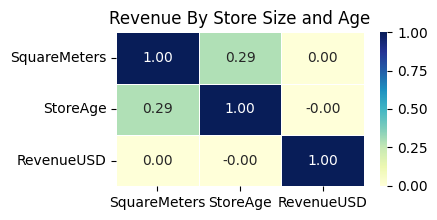

In [22]:
df_store = final_merged[(final_merged['SquareMeters'] != 0) & (final_merged['StoreAge'] != 0)]

corr = df_store[['SquareMeters', 'StoreAge', 'RevenueUSD']].corr()
print(corr)

plt.figure(figsize=(4, 2))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt='.02f', linewidths=0.5)


plt.title('Revenue By Store Size and Age')
plt.show()

Revenue shows almost negligible/no correlation with 'Store Age' and 'Store Size'. This suggests that revenue or profit does not vary with these 2 parameters.

Q4. Top selling products, brands or categories across different regions and demographics

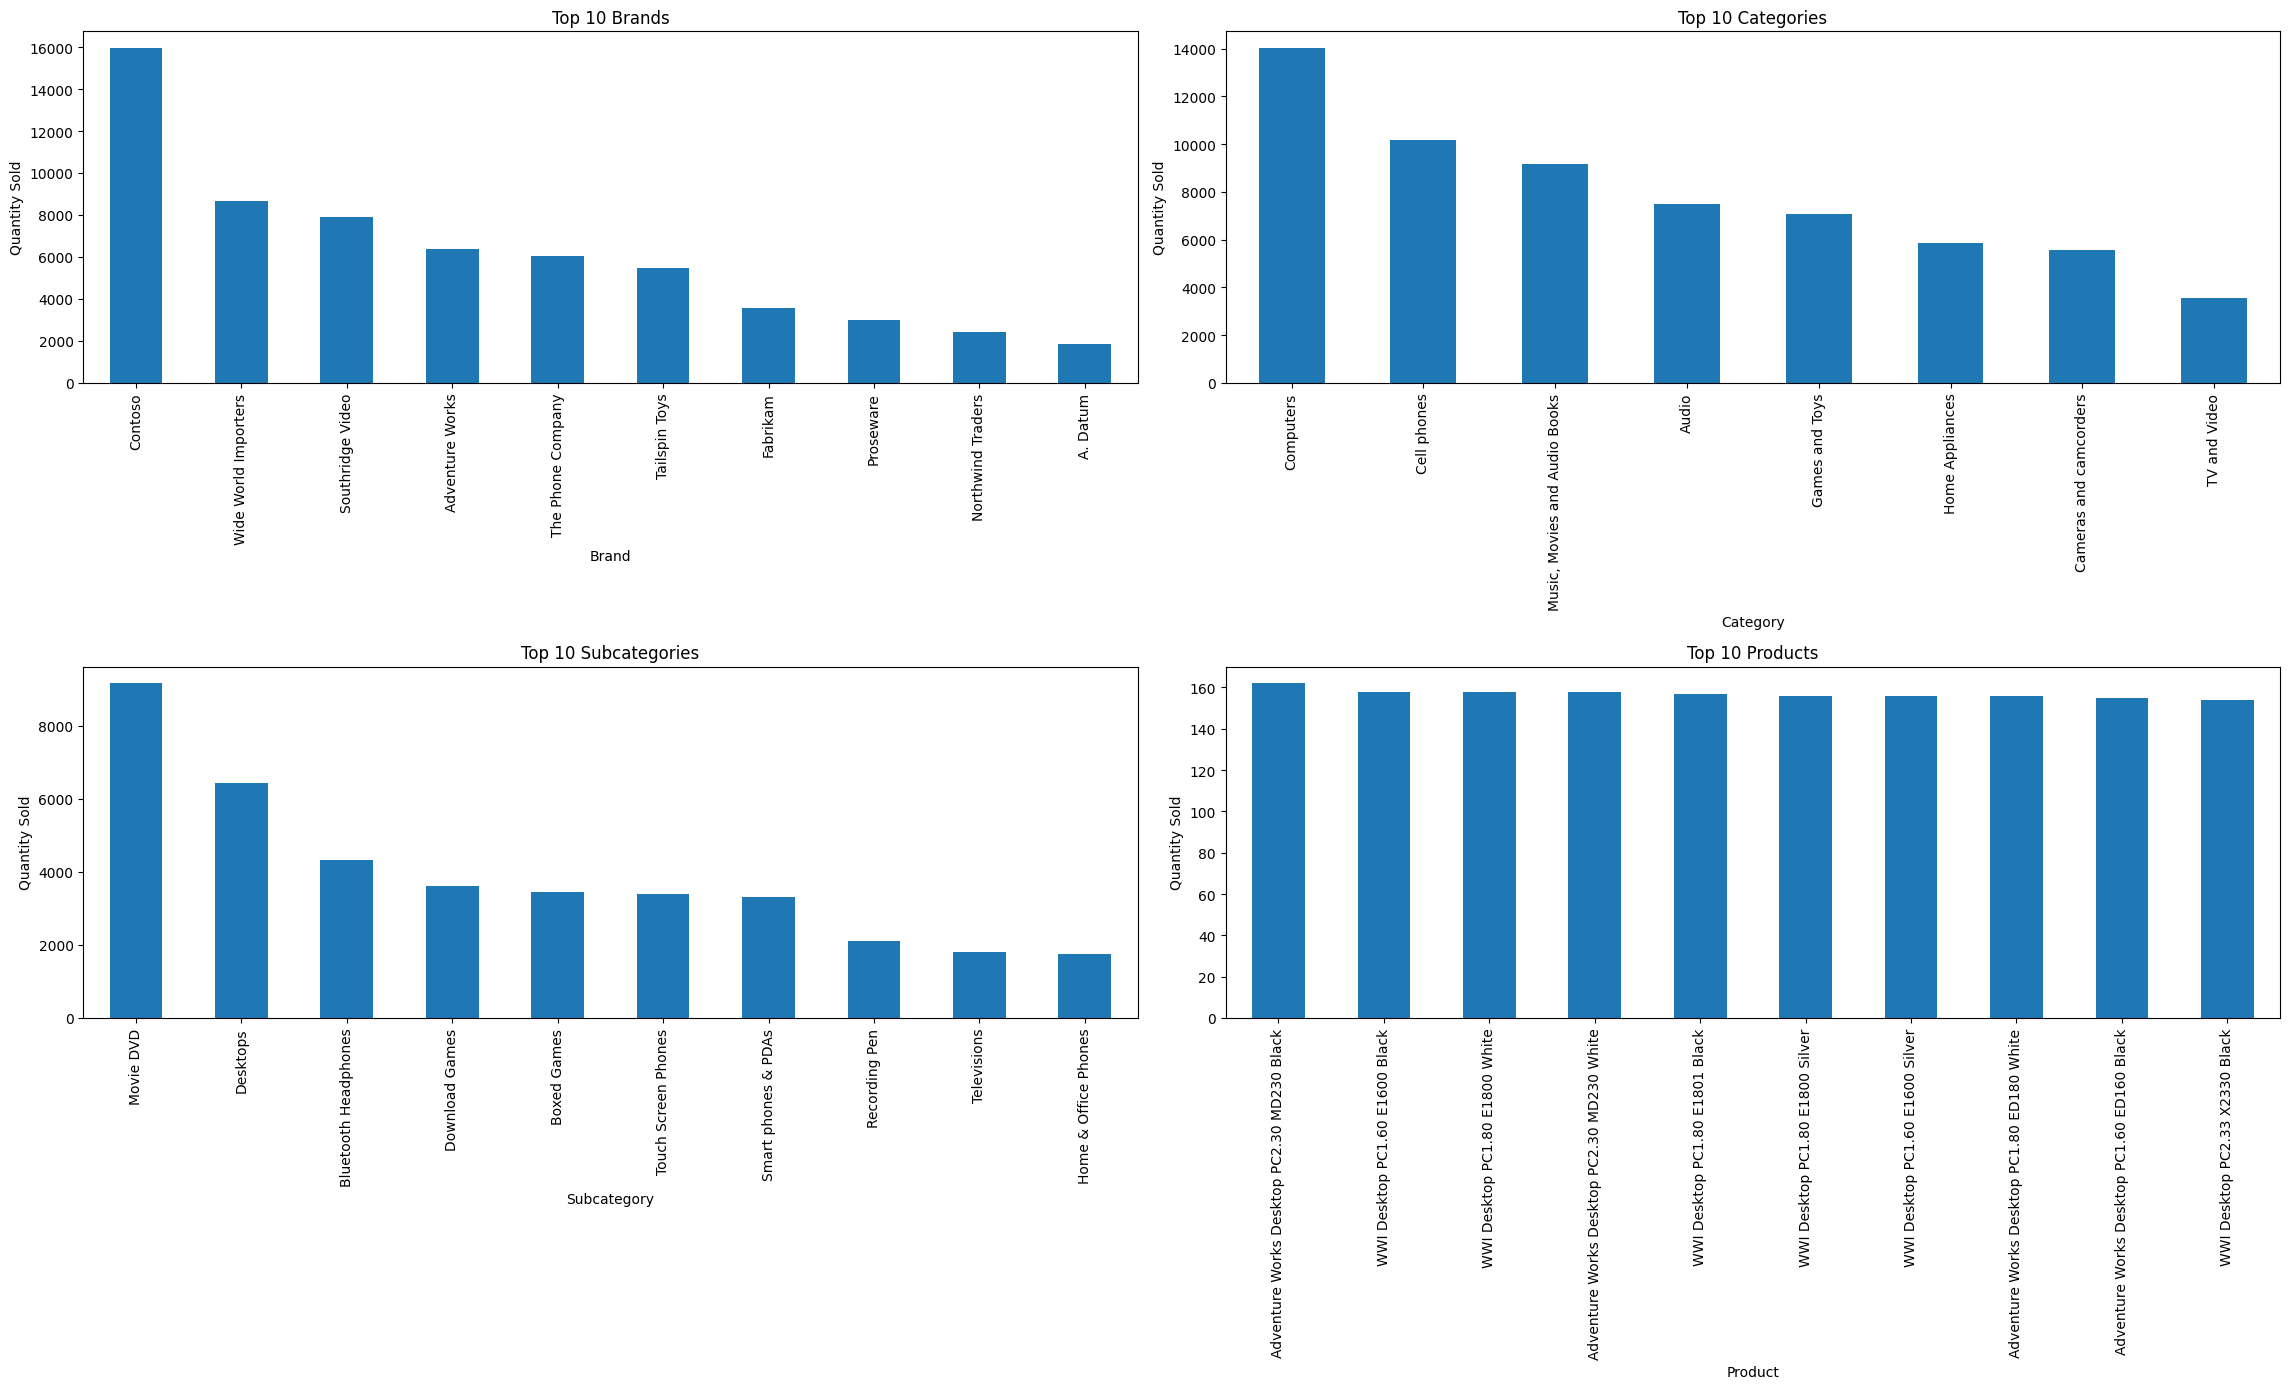

In [23]:
plt.figure(figsize=(23, 14))

# 1. Top Selling Brand
brand_counts = final_merged['Brand'].value_counts()
top_brands = brand_counts.nlargest(10)

plt.subplot(2, 2, 1)
top_brands.plot(kind='bar')
plt.xlabel('Brand')
plt.ylabel('Quantity Sold')
plt.title('Top 10 Brands')
plt.xticks(rotation=90)

# 2. Top Selling Categories
category_counts = final_merged['Category'].value_counts()
top_category = category_counts.nlargest(10)

plt.subplot(2, 2, 2)
top_category.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Quantity Sold')
plt.title('Top 10 Categories')
plt.xticks(rotation=90)

# 3. Top Selling Sub-categories
scategory_counts = final_merged['Subcategory'].value_counts()
top_scategory = scategory_counts.nlargest(10)

plt.subplot(2, 2, 3)
top_scategory.plot(kind='bar')
plt.xlabel('Subcategory')
plt.ylabel('Quantity Sold')
plt.title('Top 10 Subcategories')
plt.xticks(rotation=90)

# 4. Top Selling Products
product_counts = final_merged['ProductName'].value_counts()
top_product = product_counts.nlargest(10)

plt.subplot(2, 2, 4)
top_product.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.title('Top 10 Products')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Insights:

1. Leading Brands: Contos dominates followed by Wide World Importers, Southridge Video and Adventure Works. Contoso's lead indicates strong brand recognition and customer preference. Marketing and product quality likely contribute to this brand's success.

2. Top Category and Subcategory: Computers are the most popular category followed by Cell Phones. Bluetooth Headphones is a subctegory in demand. This indicates strong preference for technology and electronics among Customers. Next in the list is Music, Movies and Audio Books which suggests a substantial market for entertainment content.

3. Top Products:The highest-selling products are desktop computers from "Adventure Works Desktop" and "WWI Desktop" series.The focus on desktop computers suggests a high demand for these products among customers, potentially due to specific features or competitive pricing.

Q5. Overall Store Profit by Day, Week, Month, Year

In [24]:
daily_revenue = final_merged.groupby('OrderDate')['RevenueUSD'].sum().reset_index()

avg_revenue = daily_revenue['RevenueUSD'].median()
print(f'Average Revenue Per Day: ${avg_revenue:.2f}')

# Resample by week and calculate total revenue per month
weekly_revenue = final_merged.resample('W', on='OrderDate')['RevenueUSD'].sum().reset_index()

# Calculate the average revenue per week
avg_weekly_revenue = weekly_revenue['RevenueUSD'].median()
print(f'Average Revenue Per Week: ${avg_weekly_revenue:.2f}')

# Resample by month and calculate total revenue per month
monthly_revenue = final_merged.resample('ME', on='OrderDate')['RevenueUSD'].sum().reset_index()

# Calculate the average revenue per month, taking median as it may have outliers
avg_monthly_revenue = monthly_revenue['RevenueUSD'].median()
print(f'Average Revenue Per Month: ${avg_monthly_revenue:.2f}')

# Resample by year and calculate total revenue per year
yearly_revenue = final_merged.resample('YE', on='OrderDate')['RevenueUSD'].sum().reset_index()

# Calculate the average revenue per year
avg_yearly_revenue = yearly_revenue['RevenueUSD'].mean()
print(f'Average Revenue Per Year: ${avg_yearly_revenue:.2f}')

Average Revenue Per Day: $26792.28
Average Revenue Per Week: $160329.93
Average Revenue Per Month: $672552.73
Average Revenue Per Year: $9292579.93


(array([16436., 16801., 17167., 17532., 17897., 18262., 18628.]),
 [Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021')])

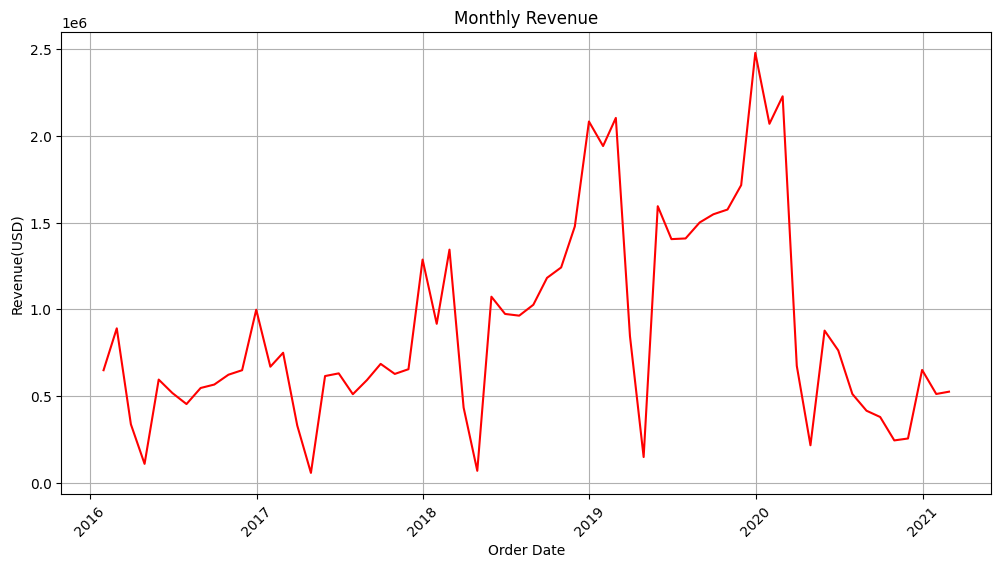

In [25]:
plt.figure(figsize=(12, 6))

plt.plot(monthly_revenue['OrderDate'], monthly_revenue['RevenueUSD'], linestyle='-', color='r')
plt.title('Monthly Revenue')
plt.xlabel('Order Date')
plt.ylabel('Revenue(USD)')
plt.grid(True)
plt.xticks(rotation=45)

In [26]:
# Extract month from the OrderDate
final_merged['Month'] = final_merged['OrderDate'].dt.month

# Filter data for April (Month 4)
for i in range(1,13):
    month_data = final_merged[final_merged['Month'] == i]

    # Calculate total revenue for the month
    total_revenue_month = month_data['RevenueUSD'].sum()

    print(f'Total Revenue for Month {i}: ${total_revenue_month:,.2f}')

Total Revenue for Month 1: $6,759,981.20
Total Revenue for Month 2: $7,842,476.23
Total Revenue for Month 3: $2,625,522.85
Total Revenue for Month 4: $607,334.05
Total Revenue for Month 5: $4,757,983.80
Total Revenue for Month 6: $4,293,036.54
Total Revenue for Month 7: $3,852,415.81
Total Revenue for Month 8: $4,085,169.32
Total Revenue for Month 9: $4,363,863.61
Total Revenue for Month 10: $4,315,027.44
Total Revenue for Month 11: $4,756,059.88
Total Revenue for Month 12: $7,496,608.86


Insights:

1. The sales trend shows a decline in April every year. However, it gradually increased, peaking in Dec continuing onto Jan and Feb in the subsequent year
2. Overall, there is an upward trend since 2017 until it reached its peak in 2020. Post April 2020, it is visible that sales has not seen its expected upward trend.

In [29]:
final_merged['Month'] = final_merged['OrderDate'].dt.month

# Filter data for April (Month 4)
for i in range(1,13):
    month_data = final_merged[final_merged['Month'] == i]

    # Calculate total revenue for the month
    total_revenue_month = month_data['RevenueUSD'].sum()

    print(f'Total Revenue for Month {i}: ${total_revenue_month:,.2f}')

Total Revenue for Month 1: $6,759,981.20
Total Revenue for Month 2: $7,842,476.23
Total Revenue for Month 3: $2,625,522.85
Total Revenue for Month 4: $607,334.05
Total Revenue for Month 5: $4,757,983.80
Total Revenue for Month 6: $4,293,036.54
Total Revenue for Month 7: $3,852,415.81
Total Revenue for Month 8: $4,085,169.32
Total Revenue for Month 9: $4,363,863.61
Total Revenue for Month 10: $4,315,027.44
Total Revenue for Month 11: $4,756,059.88
Total Revenue for Month 12: $7,496,608.86


Create MySQL DB/Tables and push the data

In [30]:
import streamlit as st
import toml
import sqlalchemy
from sqlalchemy import create_engine, text

# Connecting to Database
host = st.secrets["credentials"]["host"]
user = st.secrets["credentials"]["user"]
password = st.secrets["credentials"]["password"]
database = 'GlobalElectronics'

# Create SQLAlchemy Engine 
engine = create_engine(f'mysql+mysqlconnector://{user}:{password}@{host}/{database}')     


In [31]:
# Create Customers Table
create_customer = """
CREATE TABLE IF NOT EXISTS customers (
    CustomerKey INT PRIMARY KEY NOT NULL,
    Gender VARCHAR(10),
    Name VARCHAR(255),
    City VARCHAR(255),
    StateCode VARCHAR(255),
    State VARCHAR(255),
    ZipCode VARCHAR(20),
    Country VARCHAR(100),
    Continent VARCHAR(100),
    Birthday DATE,
    Age INT,
    AgeRange VARCHAR(20)
)"""

with engine.connect() as connection:
    connection.execute(text(create_customer))
    
# Push the Customer data into Mysql
customers.to_sql('customers', con=engine, if_exists='replace', index=False)

15266

In [32]:
# Create Exchange Rates Table
create_exchange_rate = """
CREATE TABLE IF NOT EXISTS ExchangeRates(
    Date DATE,
    Currency VARCHAR(3),
    Exchange FLOAT,
    PRIMARY KEY (Date, Currency)
)"""

with engine.connect() as connection:
    connection.execute(text(create_exchange_rate))
    
# Push the ExchangeRates data into Mysql
exchange.to_sql('exchangerates', con=engine, if_exists='replace', index=False)

11215

In [33]:
# Create Products Table
create_products = """
CREATE TABLE IF NOT EXISTS Products (
    ProductKey INT PRIMARY KEY NOT NULL,
    ProductName VARCHAR(255),
    Brand VARCHAR(100),
    Color VARCHAR(50),
    UnitCostUSD FLOAT,
    UnitPriceUSD FLOAT,
    SubcategoryKey INT,
    Subcategory VARCHAR(255),
    CategoryKey INT,
    Category VARCHAR(255)
)
"""
with engine.connect() as connection:
    connection.execute(text(create_products))
    
# Push the Products data into Mysql
products.to_sql('products', con=engine, if_exists='replace', index=False)

2517

In [34]:
# Create Sales Table
create_sales = """
CREATE TABLE IF NOT EXISTS Sales (
    OrderNumber INT,
    LineItem INT,
    OrderDate DATE,
    DeliveryDate DATE,
    CustomerKey INT,
    StoreKey INT,
    ProductKey INT,
    Quantity INT,
    CurrencyCode VARCHAR(10),
    PRIMARY KEY (OrderNumber, LineItem)
)
"""
with engine.connect() as connection:
    connection.execute(text(create_sales))

# Push the Sales data into Mysql
sales.to_sql('sales', con=engine, if_exists='replace', index=False)

62884

In [37]:
# Create Stores Table
create_stores = """
CREATE TABLE IF NOT EXISTS Stores (
    StoreKey INT PRIMARY KEY NOT NULL,
    Country VARCHAR(100),
    State VARCHAR(100),
    SquareMeters FLOAT,
    OpenDate DATE,
    StoreAge INT
)
"""
with engine.connect() as connection:
    connection.execute(text(create_stores))

# Push the Stores data into Mysql
stores.to_sql('stores', con=engine, if_exists='replace', index=False)

67

In [38]:
print("MySQL database successfully updated .....")

MySQL database successfully updated .....
